In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [5]:
columns_train = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]
columns_test = [
    "age", "workclass", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]
train_df = pd.read_csv("adult.data.csv", header=None, names=columns_train)
test_df = pd.read_csv("adult.test.csv", header=None, names=columns_test, skiprows=1)
test_df["income"] = test_df["income"].str.replace(".", "", regex=False)

In [6]:
train_df = train_df.replace("?", pd.NA).dropna()
test_df = test_df.replace("?", pd.NA).dropna()
train_df = train_df.drop(columns=["fnlwgt"])
ordered_columns = [
    "age", "workclass", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]
train_df = train_df[ordered_columns]
test_df = test_df[ordered_columns]
data = pd.concat([train_df, test_df], ignore_index=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48843 non-null  object
 1   workclass       48843 non-null  object
 2   education       48843 non-null  object
 3   education-num   48843 non-null  object
 4   marital-status  48843 non-null  object
 5   occupation      48843 non-null  object
 6   relationship    48843 non-null  object
 7   race            48843 non-null  object
 8   sex             48843 non-null  object
 9   capital-gain    48843 non-null  object
 10  capital-loss    48843 non-null  object
 11  hours-per-week  48843 non-null  object
 12  native-country  48843 non-null  object
 13  income          48843 non-null  object
dtypes: object(14)
memory usage: 5.2+ MB


Trần Quân Bảo - 6351071005


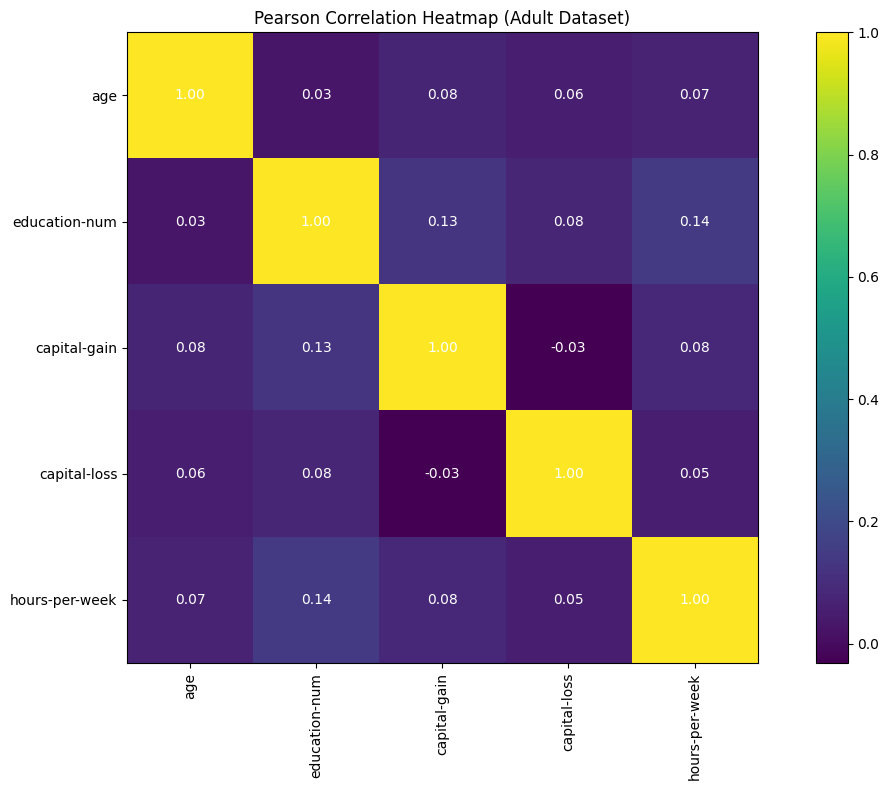

In [20]:
numeric_cols = ["age", "education-num", "capital-gain",
                "capital-loss", "hours-per-week"]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

corr = data[numeric_cols].corr(method='pearson')

plt.figure(figsize=(12, 8))
plt.imshow(corr, cmap="viridis")
plt.colorbar()
print("Trần Quân Bảo - 6351071005")
# tên cột
plt.xticks(np.arange(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(np.arange(len(numeric_cols)), numeric_cols)

# hiển thị số vào từng ô
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="white", fontsize=10)

plt.title("Pearson Correlation Heatmap (Adult Dataset)")
plt.tight_layout()
plt.show()

In [10]:
features = data.drop('income', axis=1)
labels = data['income']

In [21]:
print("Trần Quân Bảo - 6351071005")
categorical_cols = features.select_dtypes(exclude=['int64']).columns
print(categorical_cols)

Trần Quân Bảo - 6351071005
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [22]:
print("Trần Quân Bảo - 6351071005")
features_onehot = pd.get_dummies(features, columns=categorical_cols)
print(features_onehot.head())
print(features_onehot.shape)

Trần Quân Bảo - 6351071005
   age_17.0  age_18.0  age_19.0  age_20.0  age_21.0  age_22.0  age_23.0  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   

   age_24.0  age_25.0  age_26.0  ...  native-country_ Puerto-Rico  \
0     False     False     False  ...                        False   
1     False     False     False  ...                        False   
2     False     False     False  ...                        False   
3     False     False     False  ...                        False   
4     False     False     False  ...                        False   

   native-country_ Scotland  native-country_ South  native-country_ Taiwan  \
0                     False  

In [16]:
# Tách features và labels theo train/test
X_train = features_onehot[:32562]
X_test = features_onehot[32562:]

y_train = labels[:32562]
y_test = labels[32562:]

Trần Quân Bảo - 6351071005
Accuracy: 0.8274676002702537
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89     12435
        >50K       0.64      0.60      0.62      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.75      0.76     16281
weighted avg       0.82      0.83      0.83     16281



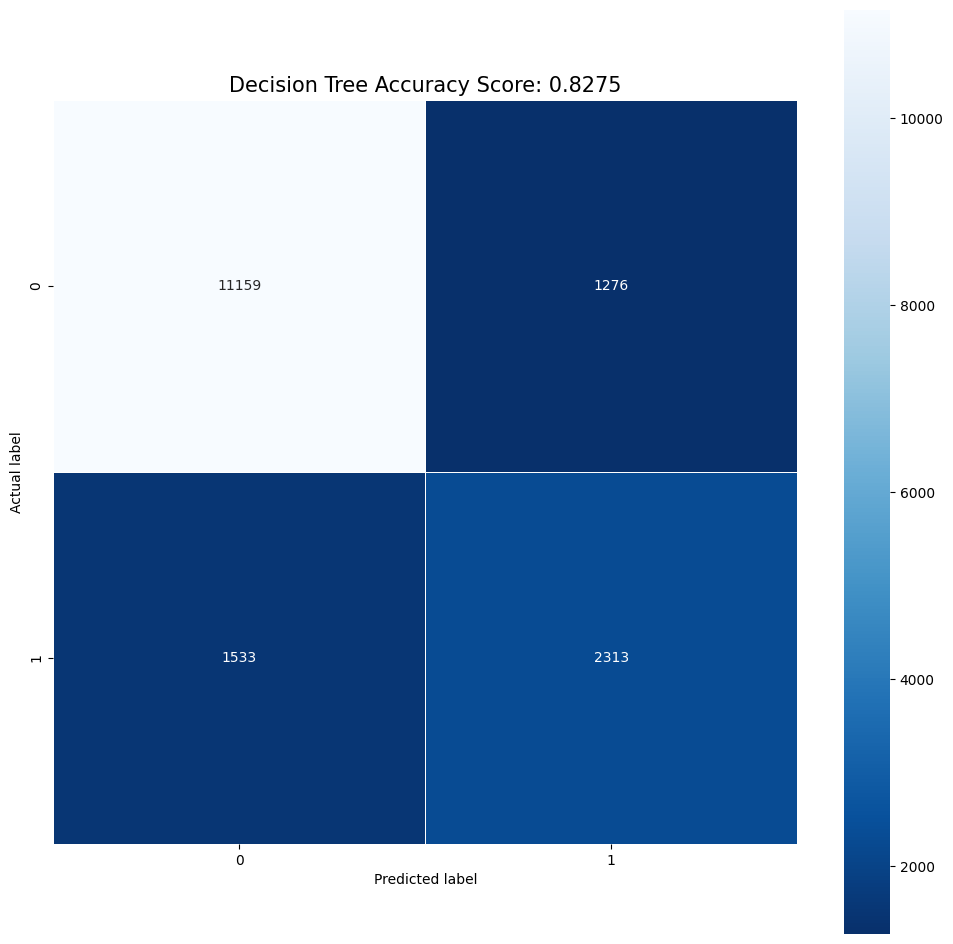

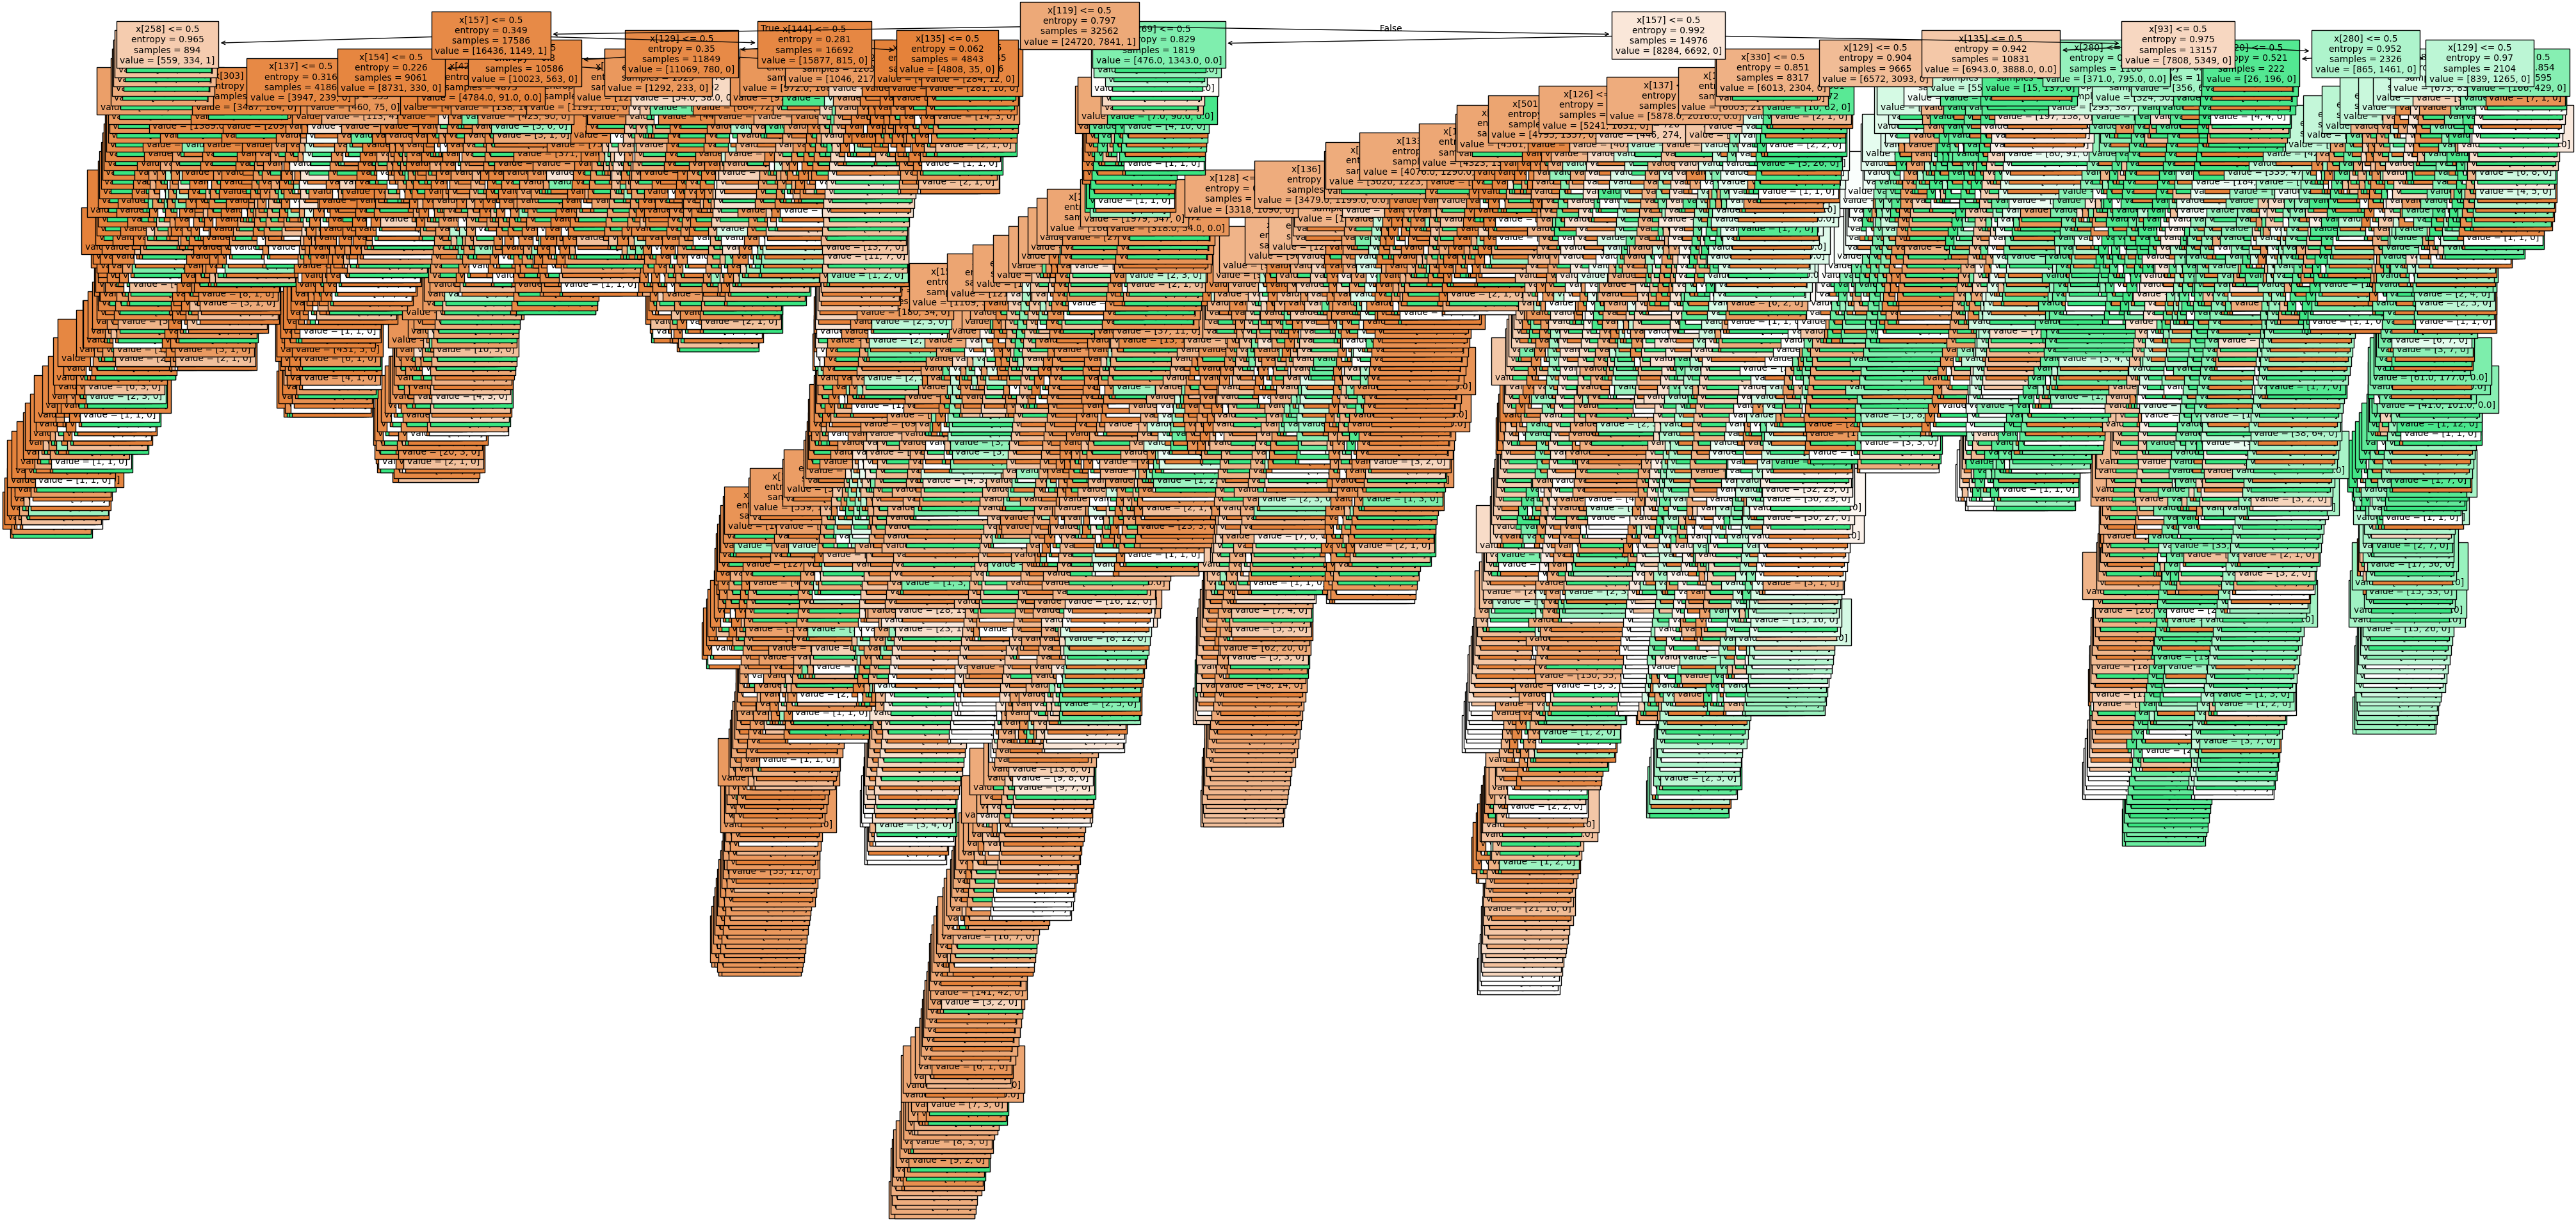

In [23]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

tree_pred = clf.predict(X_test)

print("Trần Quân Bảo - 6351071005")

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Classification Report:\n", metrics.classification_report(y_test, tree_pred))

tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Decision Tree Accuracy Score: {tree_score:.4f}', size=15)
plt.show()

fig, ax = plt.subplots(figsize=(50, 24))  # Kích thước lớn để dễ đọc
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree.png', dpi=100)
plt.show()

Trần Quân Bảo - 6351071005
Accuracy (CART): 0.8325041459369817
Classification Report (CART):
               precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89     12435
        >50K       0.65      0.62      0.64      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.76      0.76     16281
weighted avg       0.83      0.83      0.83     16281



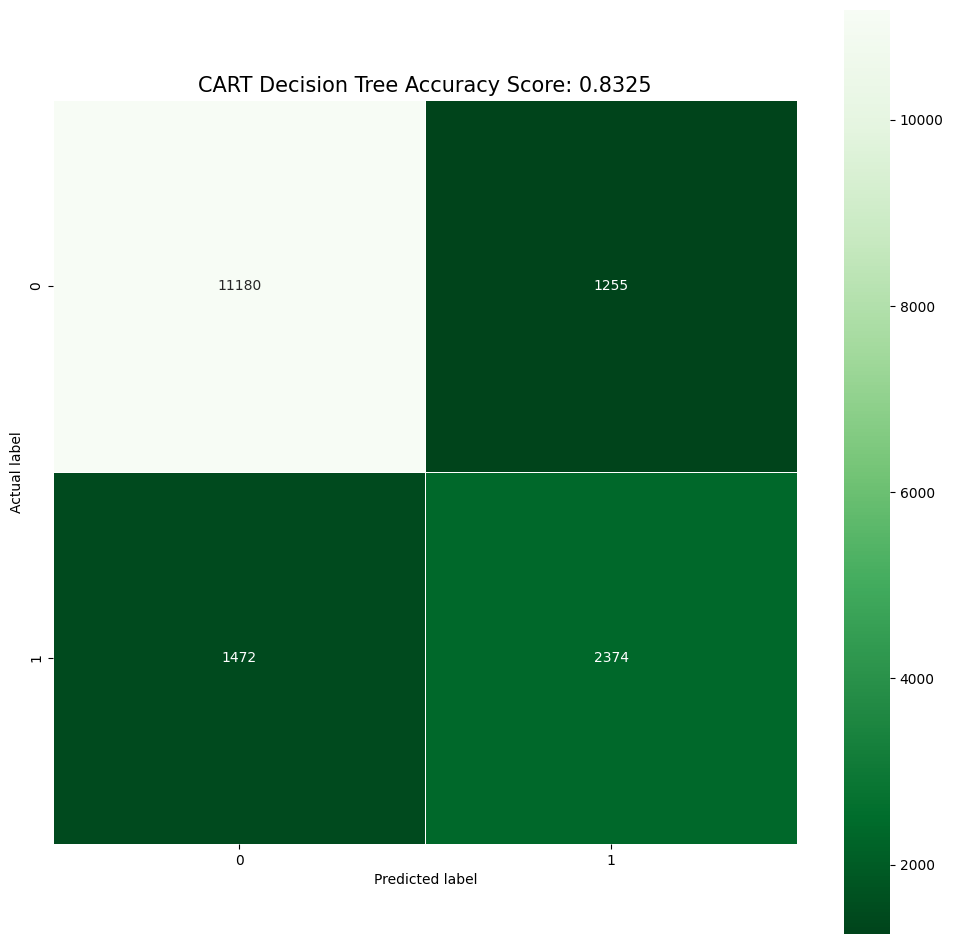

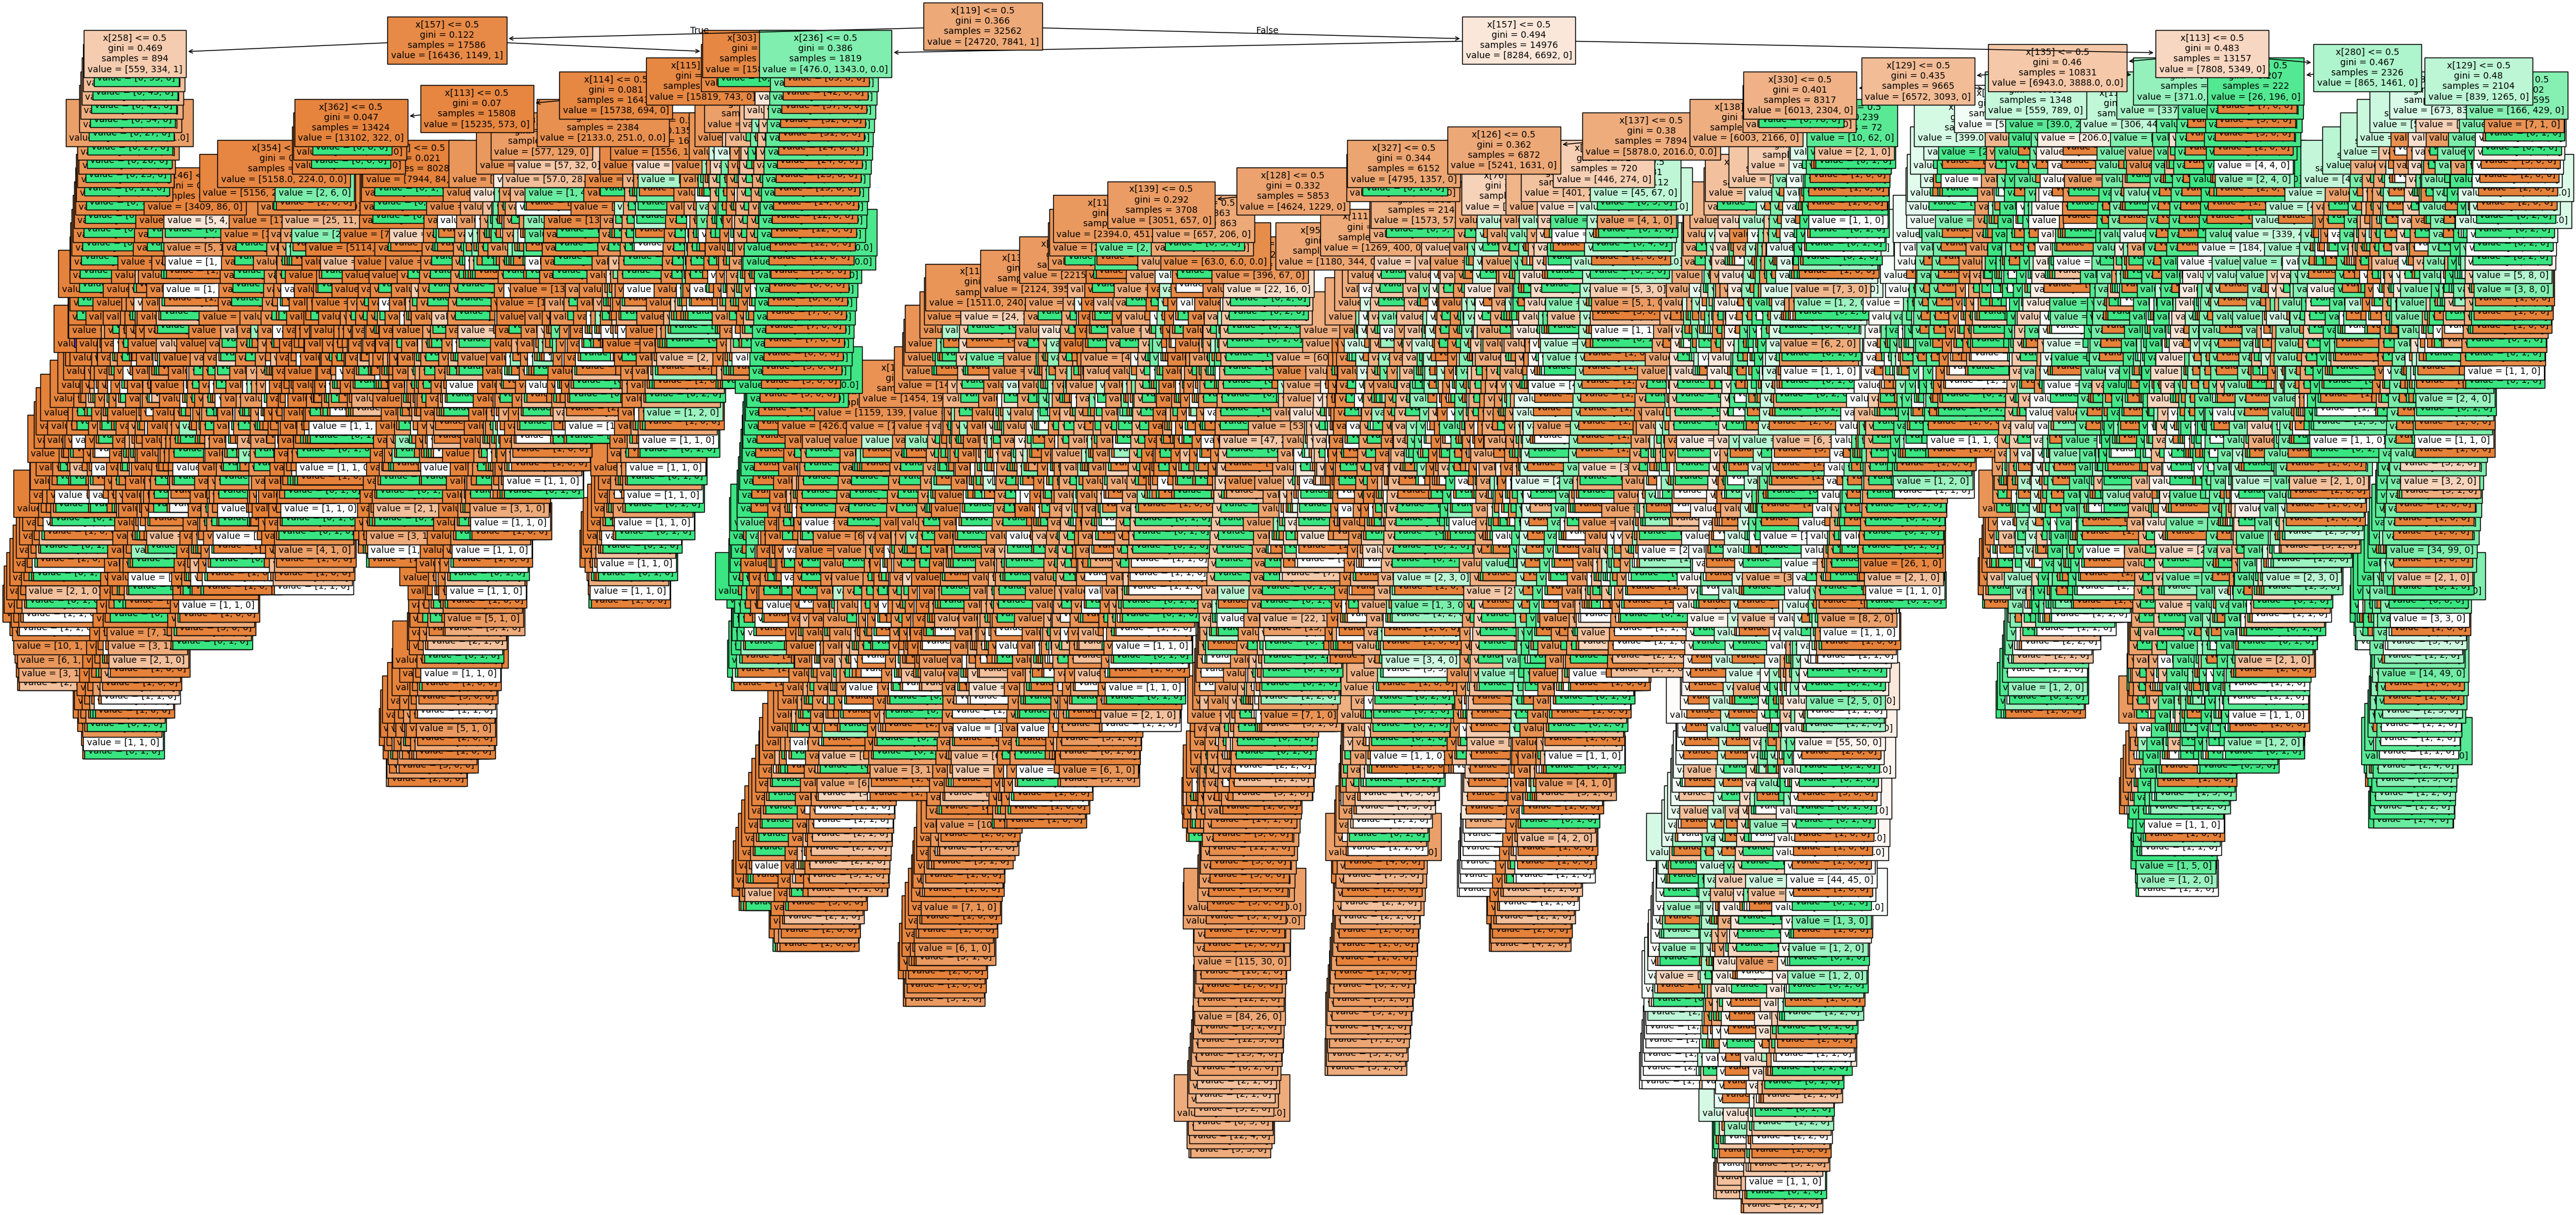

In [24]:
cart_clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
cart_clf.fit(X_train, y_train)

cart_pred = cart_clf.predict(X_test)

print("Trần Quân Bảo - 6351071005")

cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy (CART):", cart_score)
print("Classification Report (CART):\n", metrics.classification_report(y_test, cart_pred))

cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'CART Decision Tree Accuracy Score: {cart_score:.4f}', size=15)
plt.show()

fig, ax = plt.subplots(figsize=(50, 24))  # Kích thước lớn để dễ đọc
tree.plot_tree(cart_clf, filled=True, fontsize=10)
plt.savefig('cart_decision_tree.png', dpi=100)
plt.show()

Trần Quân Bảo - 6351071005
Naive Bayes Accuracy: 0.40734598611878875
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

       <=50K       0.98      0.23      0.37     12435
        >50K       0.28      0.99      0.44      3846

    accuracy                           0.41     16281
   macro avg       0.63      0.61      0.41     16281
weighted avg       0.82      0.41      0.39     16281



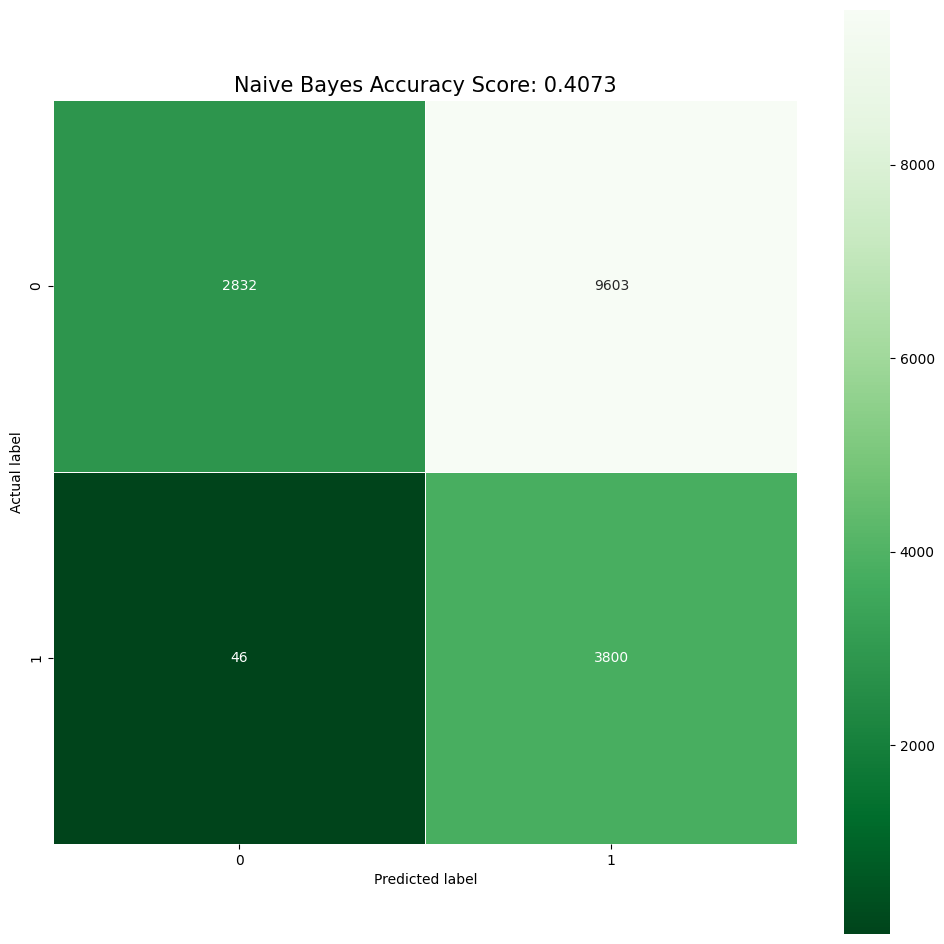

In [25]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Trần Quân Bảo - 6351071005")

bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Naive Bayes Accuracy:", bayes_score)
print("Classification Report (Naive Bayes):\n", metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Naive Bayes Accuracy Score: {bayes_score:.4f}', size=15)
plt.show()

Cây quyết định (ID3 và CART) hoạt động tốt trên dữ liệu Adult, đạt độ chính xác khoảng 83%, mô hình có khả năng dự đoán chính xác nhãn chiếm đa số (<=50K) và tương đối tốt nhãn thiểu số (>50K). CART nhỉnh hơn ID3 một chút nhờ sử dụng chỉ số Gini, giúp phân nhãn hiệu quả hơn.

Naïve Bayes không phù hợp với dữ liệu này, chỉ đạt độ chính xác ~41%. Mô hình có xu hướng dự đoán lệch: nhãn chiếm đa số (<=50K) có precision cao nhưng recall thấp, trong khi nhãn thiểu số (>50K) có recall cao nhưng precision thấp, dẫn đến F1-score thấp và hiệu quả tổng thể kém.